# **About Dataset**

This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features. Hence, it is a mixture of quantitative and qualitative data.
www.kaggle.com. (n.d.). Most Streamed Spotify Songs 2023. [online] Available at: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data.

# **Research Question**

Which Musical Features Most Strongly Influenced the Streaming Success of Songs Released Between 2020 and 2023 on Spotify?

# **Target Audience**



*   Music Industry Professionals (i.e, artists, record labels and producers, music promoters)
*   Streaming Platforms (i.e, Playlist curators)


This work resonates with a  spectrum of stakeholders that are heavily involved in the creation or promotion of music. It is for those that can benefit from understanding the consumption patterns and cultural implications of music. The analysis not only serves immediate commercial interests but also enriches the broader understanding of comtemporary music trends and listener preferences.\
**Goal**:  My goals are to identify key predictors of streaming success and to understand listener preferences on Spotify as I aim to work there one day.

# **Method**

This dataset allows me to explore patterns in music features to understand trends and preferences in popular songs. The method I will use to do this as follows:

*   **Data Extraction** : This dataset was found on www.kaggle.com
*   **Data Cleaning**: The dataset will be filtered 2020-2023. Rows with missing values will be removed. Duplicated rows will be removed. The unwanted rows namely 'in_apple_playlists', 'in_apple_charts','in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', will be removed since I am focusing solely on spotify.
*  **General Information**: Graphs depicting the most streamed artists and the most streamed songs will be provided to get a better undertanding of the dataset.
* **Correlation Heatmap**: This diagram will show which combinations are suitable for songs with high music success(a lot of streams) and identifying whcih combinations do not result in high music success on spotify.
* **Scatter Plot with Key as Hue**: This diagram will give as an insight on how relevant the predominant keys used in songs have an inlfuence on the song's success.
* **Exploring Feature Impact on Streaming Success**: This section delves into modeling and evaluation to understand how various musical features influence streaming success on Spotify.
* **Feature Importance Analysis with Random Forests**: This section shows the importance of features using a different model type like a random forest regressor. This allows one to see if the feature importance rankings change or if the random forest model provides a better overall performance for this task.
* **Limitations**: Any limitation that may affect my results or not prevent me from answering the research question as accurately will be provided.
* **Conclusion**: Final remarks of my investigation and further considerations will be provided.




## **Import relevant libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots

In [2]:
#uploading the data
df = pd.read_csv('/content/spotify-2023.csv',encoding = 'latin-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
#checking the description
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [4]:
#viewing the dataset
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


##**Cleaning the dataset**

In [5]:
#filtering it from 2020-2023
df_new = df[df['released_year'] >= 2020]

In [6]:
#Shape of dataset
print(f"Number of column: {df_new.shape[1]}\nNumber of rows: {df_new.shape[0]}")

Number of column: 24
Number of rows: 733


In [7]:
#Looking for missing values
df_new.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        27
bpm                      0
key                     76
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [8]:
#dropping rows with missing values
df_new.dropna(axis='rows')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [9]:
#renaming some columns
df_new.rename(columns={'danceability_%': 'Danceability',
                       'valence_%': 'Valence',
                       'energy_%': 'Energy',
                       'acousticness_%': 'Acousticness',
                       'instrumentalness_%': 'Instrumentalness',
                       'liveness_%': 'Liveness',
                       'speechiness_%': 'Speechiness'}, inplace=True)

#dropping unwanted columns
df_new.drop(['in_apple_playlists', 'in_apple_charts','in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts',],axis=1,inplace=True)

df_new


<ipython-input-9-c05bf6cf441b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-9-c05bf6cf441b>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,Danceability,Valence,Energy,Acousticness,Instrumentalness,Liveness,Speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,138,F,Major,51,32,53,17,0,31,6
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,141,C#,Major,92,66,58,19,0,8,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,97,C#,Major,82,67,77,8,0,12,5


In [10]:
#looking for duplicates
df.duplicated().sum()

0

In [11]:
total_artists = df_new['artist(s)_name'].nunique()
print(f"total number of artists = {total_artists}")

total number of artists = 503


In [12]:
artist_counts = df_new['artist(s)_name'].value_counts()
artist_counts

Taylor Swift                  26
Bad Bunny                     19
SZA                           19
The Weeknd                    17
Harry Styles                  13
                              ..
Fuerza Regida, Chino Pacas     1
Melanie Martinez               1
Zach Bryan                     1
Marï¿½ï¿½lia Mendo             1
Feid, Sech, Jhayco             1
Name: artist(s)_name, Length: 503, dtype: int64

## **General Information**

### **Most Streamed Artists**

In [39]:
#graph depicting the top 15 artists with the most streamed artists(from 2020-2023)
color_sequence = [
    '#FF6F61',  # Coral
    '#6B5B95',  # Purple
    '#88B04B',  # Olive Green
    '#F7CAC9',  # Soft Pink
    '#92A8D1',  # Soft Blue
    '#955251',  # Brick Red
    '#B565A7',  # Mauve
    '#009B77',  # Sea Green
    '#DD4124',  # Fiery Red
    '#D65076',  # Magenta
    '#45B8AC',  # Turquoise
    '#EFC050',  # Marigold
    '#5B5EA6',  # Royal Blue
    '#9B2335',  # Crimson
    '#DFCFBE',  # Beige
    '#55B4B0',  # Medium Turquoise
    '#E15D44',  # Vermilion
    '#7FCDCD',  # Pale Cyan
    '#BC243C',  # Strong Red
    '#C3447A'   # Raspberry
]

fig = px.bar(artist_counts[:15],
             text_auto = True,
             color = artist_counts[:15].index,
             color_discrete_sequence = color_sequence,
             labels=dict(index="Artist Names",value="Count"),
             title = 'Top 15 Artists with Most Songs(2020-2023)'
            )

fig.update_layout(template='plotly_white')

fig.show()

### **Most Streamed Songs**

In [38]:
Top_songs = df_new[['track_name','streams']]
Top_songs['streams'] = pd.to_numeric(Top_songs['streams'], errors='coerce')

#selecting top 10 rows
Top = Top_songs[['track_name','streams']].sort_values(by = 'streams', ascending= False).head(10)
Top

<ipython-input-38-7b4bdeb8d126>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,track_name,streams
84,STAY (with Justin Bieber),2665343922
71,Heat Waves,2557975762
14,As It Was,2513188493
513,good 4 u,1887039593
535,drivers license,1858144199
410,INDUSTRY BABY (feat. Jack Harlow),1814349763
433,Levitating (feat. DaBaby),1802514301
555,Dakiti,1763363713
519,MONTERO (Call Me By Your Name),1735441776
584,Mood (feat. Iann Dior),1699402402


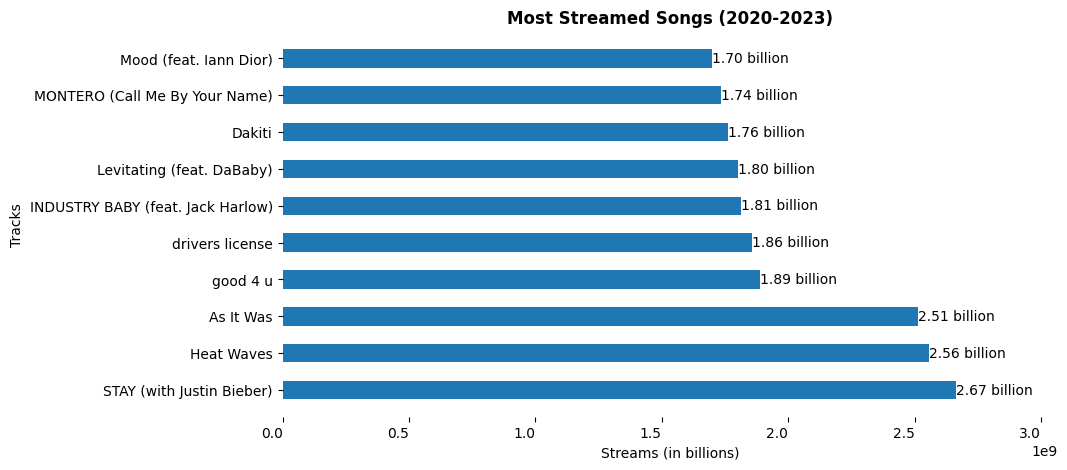

In [27]:
#creating a bar graph for the most streamed songs

top_10_streams = Top_songs.nlargest(10, 'streams')
fig, ax = plt.subplots(figsize=(10, 5))

bar_container = ax.barh(top_10_streams['track_name'], top_10_streams['streams'], height=0.5);
ax.set(xlabel='Streams (in billions)', ylabel='Tracks', title='Most Streamed Songs (2020-2023)')
ax.title.set_weight('bold')

plt.xticks(ha='right')
ax.margins(x=0.15)

for location in ['top', 'bottom', 'left', 'right']:
    ax.spines[location].set_visible(False)

ax.bar_label(bar_container, fmt=lambda x: f'{x / 10**9:.2f} billion')
plt.show()

# **Data Exploration**

## **Correlation Heatmap**

In [33]:
#sorting the streams in descending order
sorted_streams = df_new.sort_values(by='streams', ascending=False)

#renaming the columns for the graoh
Correlation = sorted_streams.rename(columns = ({'danceability_%':'Danceability', 'valence_%':'Valence', 'energy_%':'Energy',
       'acousticness_%':'Acousticness', 'instrumentalness_%':'Instrumentalness', 'liveness_%':'Liveness', 'speechiness_%':'Speechiness'}))
Correlation.head()

#removing unwanted columns
Correlation= Correlation.drop([ 'bpm','key', 'mode','released_year','released_month','released_day','artist_count','in_spotify_playlists','in_spotify_charts'], axis=1)

#setting up my data for the correlation heatmap
Mx= Correlation.corr()

<ipython-input-33-4ebf4dc64fa8>:13: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



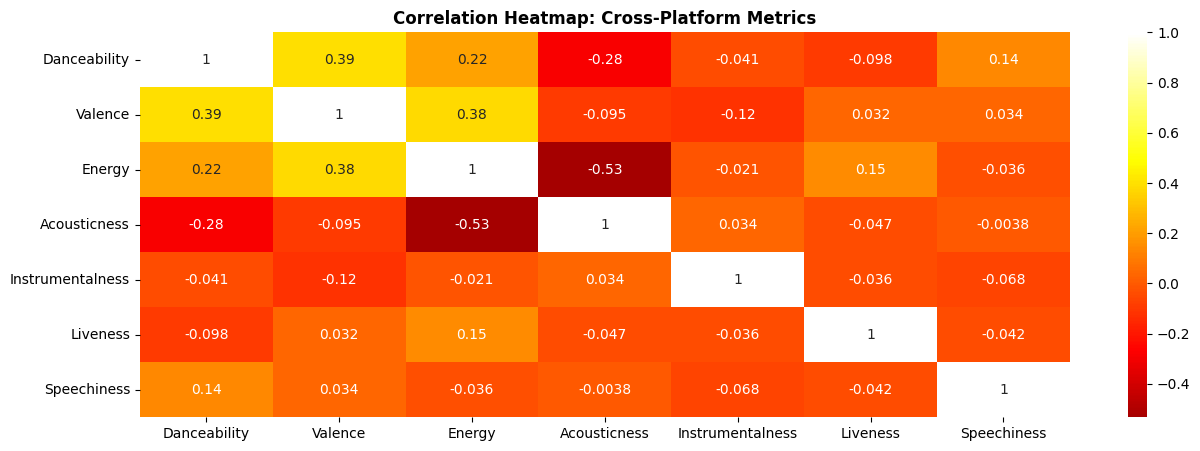

In [17]:
plt.figure(figsize=(15, 5))
sns.heatmap(Mx, annot=True, cmap='hot', center=0)
plt.title('Correlation Heatmap: Cross-Platform Metrics',fontweight='bold')
plt.show()

The correlation heatmap above shows the correlation between music features in our dataset(excluding bpm and key).Most of the columns in the correlation heatmap have weak negative correlation with the number of streams, indicating a mild inverse relationship. It should be noted that the practical significance of these weak correlations may be limited.

**Highest value**: There is a moderate positive correlation between danceability and valence. This suggests that when aiming to create a danceable song, it's likely to have a more positive or cheerful mood (valence).\
**Lowest value**: There is a moderate negative correlation between acousticness and energy. This implies that songs with lower acousticness (less acoustic, more electronic) tend to have higher energy levels. Therefore, if one is looking to create a more energetic song, reducing acoustic elements and incorporating more electronic or produced elements may be effective.

## **Scatter Plot**

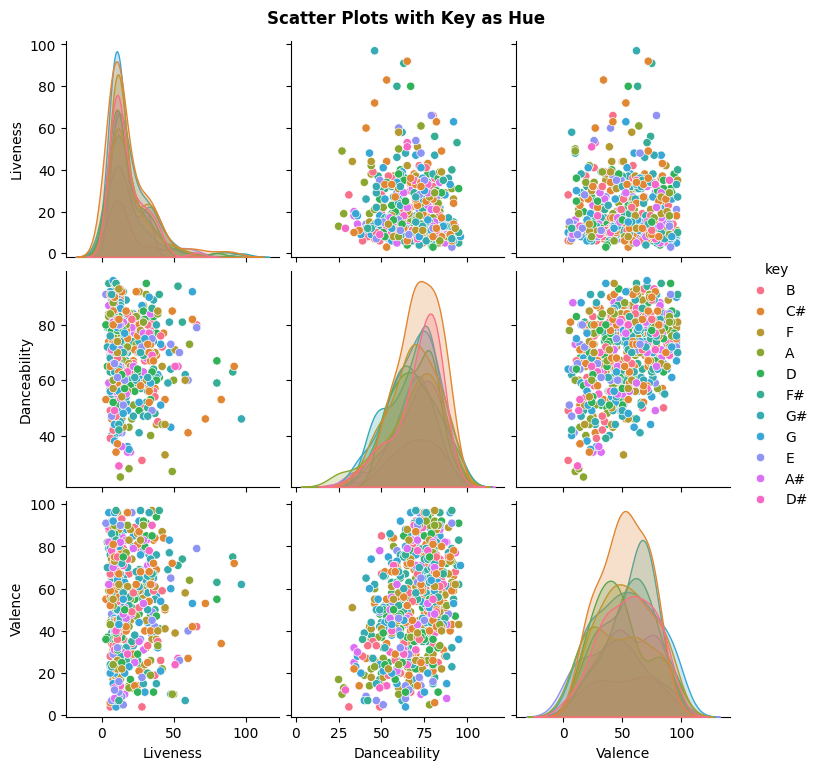

In [21]:
#making scatter plots with key as a hue(only using top 3 most important features)
sns.pairplot(df_new[['streams', 'Liveness', 'Danceability', 'Valence', 'key']], hue='key')
plt.suptitle('Scatter Plots with Key as Hue',fontweight='bold', y=1.02)
plt.show()

**Key:** This represents the musical scale on which the song is based.\
 **Observations:** Since the graphs showed weak correlations between these features and key, I cannot definitively say that key itself has a strong influence on streaming success. Hence, key has a limited predictive power in determining streaming success.

## **Modeling and Evaluation: Exploring Feature Impact on Streaming Success**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Preparing the data
features = ['Danceability', 'Energy', 'Valence', 'Acousticness', 'Instrumentalness', 'Liveness', 'Speechiness']
X = df_new[features]  # Predictor variables
y = df_new['streams']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
print(f"Model R^2 Score: {r2_score(y_test, y_pred)}")

# Viewing the coefficients for each feature
feature_importance = pd.DataFrame(model.coef_, index=features, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
feature_importance.index.name='Features'
print(feature_importance)


Model R^2 Score: 0.00978172284132961
                   Coefficient
Features                      
Danceability      4.076383e+05
Valence           1.154388e+05
Liveness         -1.349690e+05
Acousticness     -5.330259e+05
Energy           -7.683430e+05
Speechiness      -2.801440e+06
Instrumentalness -3.169563e+06


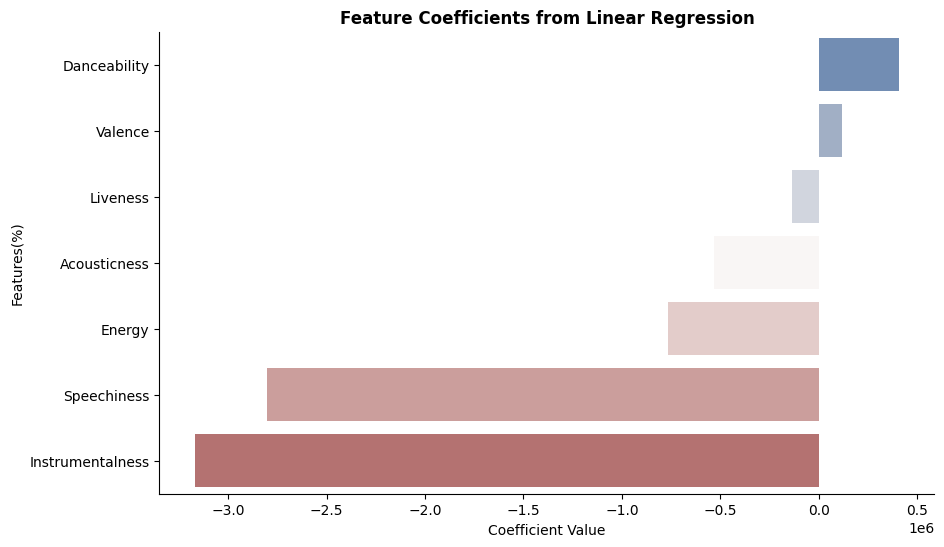

In [41]:
# Creating the bar plot for coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Features', hue='Features', data=feature_importance, palette='vlag')
plt.title('Feature Coefficients from Linear Regression',fontweight='bold')
plt.xlabel('Coefficient Value')
plt.ylabel('Features(%)')
sns.despine()
plt.grid(False)
plt.show()



The **R² score** and **coefficients** I obtained from the linear regression model offer insights into the relationship between various musical features and the number of streams on Spotify. I am using streams as a proxy for a song's success.\
The coefficients represent the change in the target variable (streams) for a one-unit change in the predictor variables (musical features), making all other predictors constant.

### **Interpretation**
The R² score represents the proportion of the variance in the dependent variable (streams) that is predictable from the independent variables (musical features). An R² score of approximately 0.01 means that the model explains about 1% of the variance in streaming numbers. That is quite low, meaning that the model doesn't effectively capture the streaming success on spotify. This shows that there are several other factors that have to be taken into account to earn a lot streams. e.g. Good marketing, status of the artist, etc.


**Positive Coefficients** **(danceability, valence)** : These features are associated with an increase in streams. For example, a one-unit increase in danceability is associated with an increase of approximately 407,638 streams. This suggests that the more danceable and valence-rich a song is, the more popular it is.\
**Negative Coefficients (liveness, acousticness, energy, speechiness, instrumentalness)**: These features are associated with a decrease in streams when they increase. For instance, a one-unit increase in the instrumentalness percenatge is associated with a decrease of approximately 3,169,563 streams. This indicates that, songs with higher instrumental content might be less popular in terms of streaming numbers.

## **Feature Importance Analysis with Random Forests**

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Fitting a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Getting feature importances
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame(importances, index=features, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importances)


                  Importance
Valence             0.180446
Danceability        0.174324
Liveness            0.171271
Acousticness        0.169533
Energy              0.158020
Speechiness         0.125215
Instrumentalness    0.021191


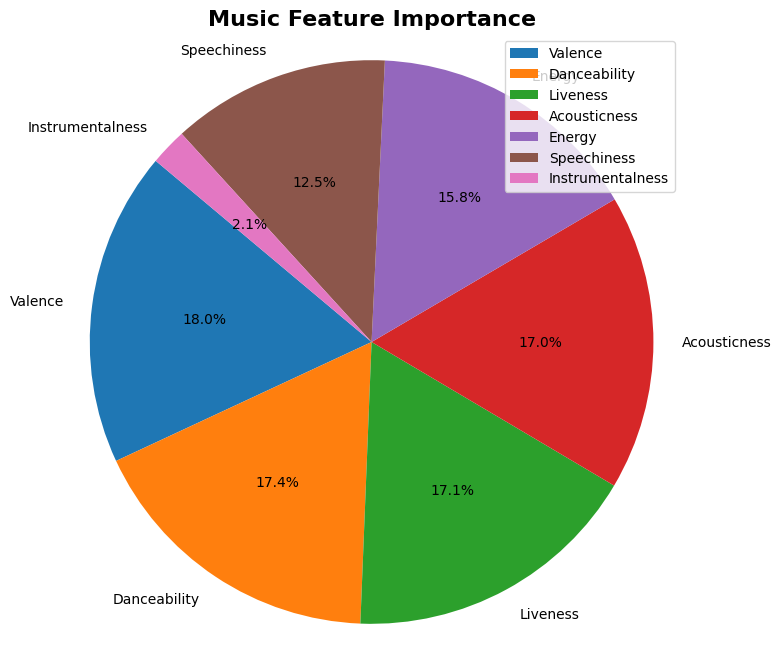

In [40]:
# Creating a pie chart for the feature importance model
plt.figure(figsize=(8, 8))
colors = plt.cm.tab10(range(len(features)))
plt.pie(feature_importances['Importance'], labels=feature_importances.index, autopct="%1.1f%%", startangle=140,
       colors=colors)

# Adding title
plt.title("Music Feature Importance", fontweight='bold',fontsize=16)
plt.axis('equal')  # Making the pie chart circular
plt.legend(fontsize=10)
plt.show()

The dataframe and pie chart above rank the importance of musical features in predicting the song's popularity (number of streams) using machine learning methods.


*   Valence is the most important feature. This indicates the song's musical positiveness. Which means people tend to prefer happy-sounding music.
*    Danceabilty is a very close second in terms of importance. Danceability reflects how suitable a track is for dancing. Its high importance suggests that songs that are easier to dance to tend to be more popular.
* Liveness detects the presence of an audience in the song. This shows that songs with a live feel might be appealing to music listeners.
* Acousticness measures how acoustic a song is. Its high ranking signifies that the acoustic quality of a song (whether it sounds more electronic or more like natural sound) significantly affects its streaming numbers.
* Energy represents the measure of intensity in the song. It is also important but it is not as valuable as the top features. Hence, calm songs are also capable of getting a lot of streams.
* Speechiness is the presence of spoken words in a track. Its lower importance relative to other features might suggest that whether a song has more or less lyrical content isn't as critical to its success as the musical or acoustic attributes.
* Instrumentalness is significantly less important than all the other features. This suggests that the presence or absence of vocal content (i.e. whether a track is instrumental) is much less influential on a song's popularity or streaming numbers.



## **Limitations**


*   I did not collect this data myself. Hence, I am not entirely certain of  the data's credibilty.
*   Music is very subjective, therefore, there are many contrasting opinions on this topic. A lot of people could argue that they value instrumentalness the most even though it is placed last in terms of importance. Additionally, peoples' taste changes over time so what was liked in the time period I have done my analysis on(2020-2023) may not be relevant in the next few years.
* My limitation to spotify may not give a true reflection on the song as a whole as all these songs were also on other streaming platforms.

## **Conclusion**


The analysis using machine learning methods revealed that valence (musical positivity) and danceability were the most crucial features for predicting streaming success.
Features like acousticness, energy, speechiness and instrumentalness were less important but still played a role.
Overall, the research highlights the importance of upbeat, positive music with moderate energy levels for achieving streaming success. Instrumental content and spoken word elements seem to be less significant factors.

**Further Considerations:**

While the analysis provides insights, it doesn't account for factors like marketing, artist popularity, genre trends or even listener demographics. These factors likely play a significant role in influencing streaming numbers. Determining what makes a song successful is a very broad topic and involves a lot considerations. Therefore, exploring additional musical features and expanding the study period could lead to a more comprehensive understanding of music streaming success.